<a href="https://colab.research.google.com/github/jmikedupont2/ai-ticket/blob/pyre/pyre/notebookcalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/jmikedupont2/ai-ticket

Cloning into 'ai-ticket'...
remote: Enumerating objects: 1921, done.
remote: Counting objects: 100% (1070/1070), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 1921 (delta 729), reused 995 (delta 668), pack-reused 851
Receiving objects: 100% (1921/1921), 12.17 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (1106/1106), done.


In [6]:
! cd ai-ticket && git fetch && git checkout pyre

Already on 'pyre'
Your branch is up to date with 'origin/pyre'.


In [7]:
import pandas as pd
import re

In [46]:
data=[]
import glob, json
names = "ai-ticket/pyre/report/0713e/report/pyre_callgraph.json"
#pyre_callgraph.json"

for name in glob.glob(names):
  print(name)
  with open(name) as fi :
    for x in fi:
      d = json.loads(x)
      data = d["response"]

ai-ticket/pyre/report/0713e/report/pyre_callgraph.json


In [63]:
calls=[]
for x in list(data.keys()):
  if (len(data[x])):
    for y in data[x]:
      #for z in y["locations"]:
      if "direct_target" in y:
        calls.append( y["direct_target"])

In [71]:

from collections import Counter

df= Counter(calls)

In [83]:
df2=pd.DataFrame(df.most_common(), columns=["name","count"])

In [84]:
df2

,name,count
0,dict.__setitem__,96
1,dict.__getitem__,94
2,io.TextIOWrapper.__enter__,88
3,BaseException.__init__,84
4,list.__getitem__,71
...,...,...
537,int.__floordiv__,1
538,autogpts.autogpt.autogpt.agents.base.BaseAgent...,1
539,autogpts.autogpt.autogpt.agents.base.BaseAgent...,1
540,autogpts.autogpt.autogpt.agents.base.BaseAgent...,1


In [86]:
table = pd.pivot_table(df,
       values="count",
        index="name", sort=True,
        # columns=['function'],
      aggfunc="sum")

KeyError: ignored

<Axes: >

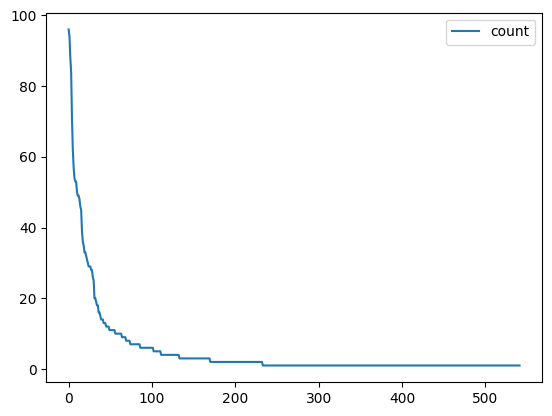

In [87]:
df2.plot()